In [151]:
from skimage.io import imread, imshow, imsave
from skimage.color import gray2rgb
from tkinter import *
from PIL import Image, ImageDraw
import numpy as np

In [152]:
path = "test.bmp"

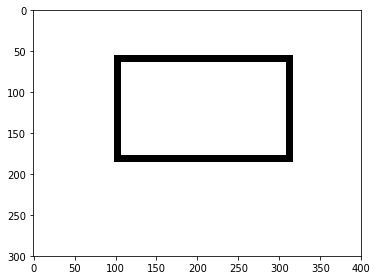

In [153]:
img = gray2rgb(imread(path))
imshow(img)

In [154]:
def find_border(img,border_color):
    x = 0
    y = 0
    for y in range (0, img.shape[0]):
        for x in range (0, img.shape[1]):
            if list(img[y][x]) == border_color:
                return (y,x)
            
def make_black(img):
    for y in range (0, img.shape[0]):
        for x in range (0, img.shape[1]):
            if list(img[y][x]) != [255,255,255]:
                img[y][x] = [0,0,0]

In [155]:
def get_border(img,start_point, border_color, direction, border_field):
    y = start_point[0]
    x = start_point[1]
    
    #print(direction)
    
    if start_point in border_field:
        #print("AAA")
        return
   
    
    border_field.add(start_point)
    
    if direction == 'l':
        if list(img[y][x-1]) == border_color:
            get_border(img, (y, x-1), border_color, 'l', border_field)
        elif list(img[y][x-1]) != border_color  and list(img[y-1][x]) == border_color:
            get_border(img, (y-1, x), border_color, 'u', border_field)
        elif list(img[y][x-1]) != border_color  and list(img[y+1][x]) == border_color:
            get_border(img, (y+1, x), border_color, 'd', border_field)

    if direction == 'r':
        #print(img[y][x+1])
        if list(img[y][x+1]) == border_color:
            get_border(img, (y, x+1), border_color, 'r', border_field)
        elif list(img[y][x+1]) != border_color  and list(img[y-1][x]) == border_color:
            get_border(img, (y-1, x), border_color, 'u', border_field)
        elif list(img[y][x+1]) != border_color  and list(img[y+1][x]) == border_color:
            get_border(img, (y+1, x), border_color, 'd', border_field)
            
    if direction == 'u':
        if list(img[y-1][x]) == border_color:
            get_border(img, (y-1, x), border_color, 'u', border_field)
        elif list(img[y-1][x]) != border_color  and list(img[y][x-1]) == border_color:
            get_border(img, (y, x-1), border_color, 'l', border_field)
        elif list(img[y-1][x]) != border_color  and list(img[y][x+1]) == border_color:
            get_border(img, (y, x+1), border_color, 'r', border_field)
        
    if direction == 'd':
        if list(img[y+1][x]) == border_color:
            get_border(img, (y+1, x), border_color, 'd', border_field)
        elif list(img[y+1][x]) != border_color  and list(img[y][x-1]) == border_color:
            get_border(img, (y, x-1), border_color, 'l', border_field)
        elif list(img[y+1][x]) != border_color  and list(img[y][x+1]) == border_color:
            get_border(img, (y, x+1), border_color, 'r', border_field)
            
    img[y][x] = [150,100,50] 

(55, 99)
None


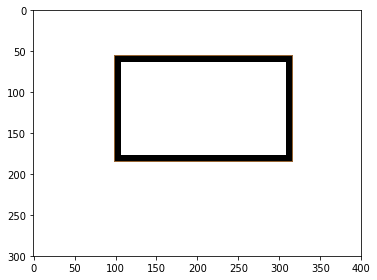

In [156]:
border_field = set()
border_color = [0,0,0]
start_point = find_border(img , border_color)
print(start_point)
border = get_border(img, start_point, border_color, 'r', border_field)
print(border)
imshow(img)